# Подготовка и анализ данных

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
import sys, os

data_folder = os.path.abspath('C:/Users/regbi/Downloads/course_project')
train_data_path = os.path.join(data_folder, 'course_project_train.csv')
test_data_path = os.path.join(data_folder, 'course_project_test.csv')

In [3]:
DTYPE = {
    'Home Ownership': np.object,
    'Annual Income': np.float64,
    'Years in current job': np.object,
    'Tax Liens': np.int64,
    'Number of Open Accounts': np.int64,
    'Years of Credit History': np.float64,
    'Maximum Open Credit': np.int64,
    'Number of Credit Problems': np.int64,
    'Months since last delinquent': np.float64,
    'Bankruptcies': np.float64,
    'Purpose': np.object,
    'Term': np.object,
    'Current Loan Amount': np.int64,
    'Current Credit Balance': np.int64,
    'Monthly Debt': np.int64,
    'Credit Score': np.float64,
    'Credit Default': np.int64,
}

In [4]:
df = pd.read_csv(train_data_path, dtype=DTYPE)
df_initial = df.copy(deep=True)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0
1,Own Home,1025487.0,10+ years,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1
2,Home Mortgage,751412.0,8 years,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0
3,Own Home,805068.0,6 years,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0
4,Rent,776264.0,8 years,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0


In [5]:
df_test = pd.read_csv(test_data_path, dtype=DTYPE)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0,9,12.5,220968,0,70.0,0.0,debt consolidation,Short Term,162470,105906,6813,NaN
1,Rent,231838.0,1 year,0,6,32.7,55946,0,8.0,0.0,educational expenses,Short Term,78298,46037,2318,699.0
2,Home Mortgage,1152540.0,3 years,0,10,13.7,204600,0,NaN,0.0,debt consolidation,Short Term,200178,146490,18729,7260.0
3,Home Mortgage,1220313.0,10+ years,0,16,17.0,456302,0,70.0,0.0,debt consolidation,Short Term,217382,213199,27559,739.0
4,Home Mortgage,2340952.0,6 years,0,11,23.6,1207272,0,NaN,0.0,debt consolidation,Long Term,777634,425391,42605,706.0


In [6]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   int64  
 4   Number of Open Accounts       7500 non-null   int64  
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   int64  
 7   Number of Credit Problems     7500 non-null   int64  
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   int64  
 13  Cur

In [8]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


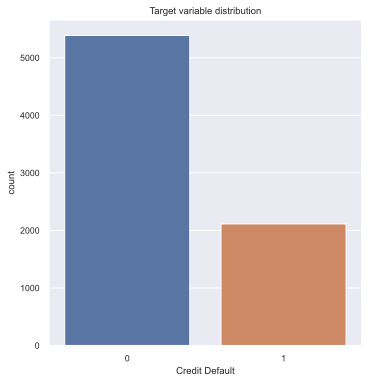

In [77]:
plt.figure(figsize=(5, 6))

sns.countplot(x=TARGET_NAME, data=df)

plt.title('Target variable distribution')
plt.show()

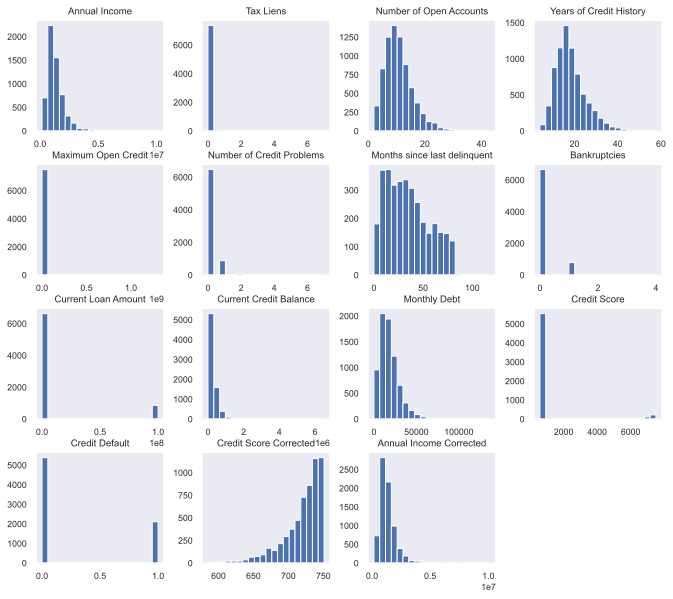

In [78]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df.select_dtypes(include=numerics).hist(figsize=(10, 10), bins=20, grid=False)
plt.show()

In [66]:
def plot_corr(df, col=[]):
    
    plt.figure(figsize = (7,7))

    sns.set(font_scale=0.8)

    
    if len(col):
        corr_matrix = df[col].corr()
    else:
        corr_matrix = df.corr()
    
    corr_matrix = np.round(corr_matrix, 2)
    corr_matrix[np.abs(corr_matrix) < 0.05] = 0

    sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

    plt.title('Correlation matrix')
    plt.show()

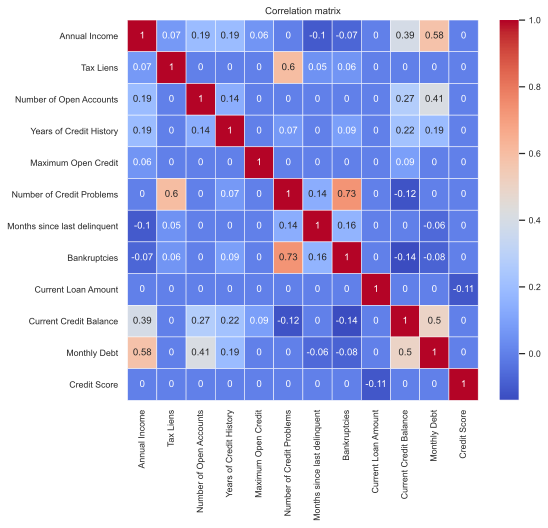

In [69]:
plot_corr(df, BASE_FEATURE_NAMES)

## Итог

Необходимо:
* проверить выбросы в **"Maximum Open Credit"**, **"Credit Score"** и **"Current Loan Amount"**
* заполнить пропуски для **"Annual Income"**, **"Years in current job"**, **"Months since last delinquent"**, **"Bankruptcies"** и **"Credit Score"**

# Проверка выбросов

In [12]:
def plot_dist(df, feature):
    plt.figure(figsize=(10,6))
    sns.distplot(df[feature])
    plt.show()

In [13]:
def plot_by_threshold(df, feature, threshold, scope='left'):
    condition = df[feature] <= threshold
    print(f'({df[condition][feature].count()} + {df[-condition][feature].count()}) = {df[feature].count()}')
    plt.figure(figsize=(10,6))
    if scope == 'left':
        sns.distplot(df[condition][feature])
    elif scope == 'right':
        sns.distplot(df[-condition][feature])
    plt.show()

## Maximum Open Credit

(7481 + 19) = 7500


C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


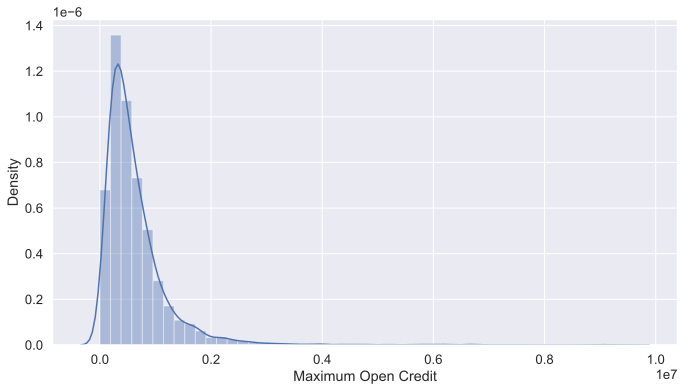

In [14]:
plot_by_threshold(df, 'Maximum Open Credit', 10000000, 'left')

(7481 + 19) = 7500


C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


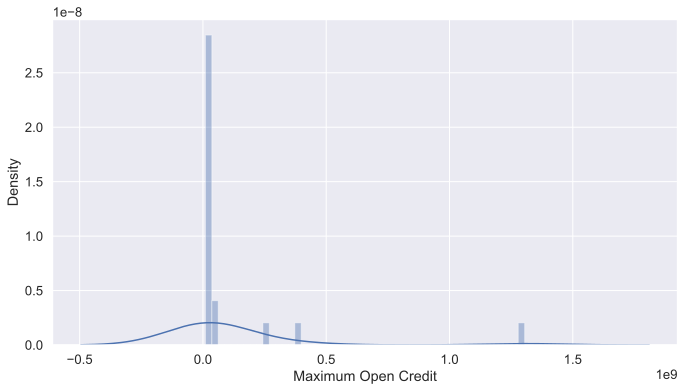

In [15]:
plot_by_threshold(df, 'Maximum Open Credit', 10000000, 'right')

### Вывод

Считаем, что выбросы являются реальнми данными без ошибок.

## Credit Score

(5543 + 400) = 5943


C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


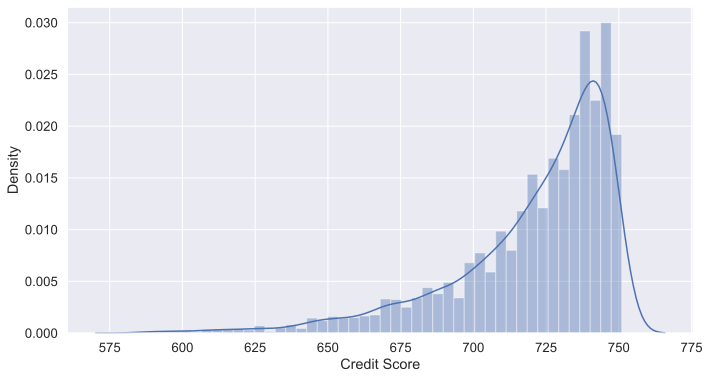

In [16]:
plot_by_threshold(df, 'Credit Score', 1000, 'left')

(5543 + 400) = 5943


C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


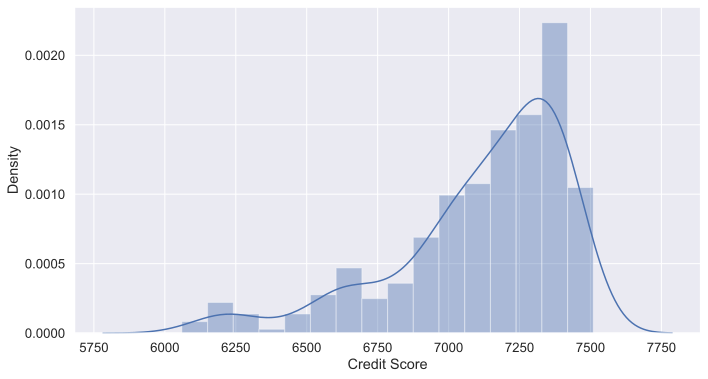

In [17]:
plot_by_threshold(df, 'Credit Score', 1000, 'right')

In [18]:
check_df = df[df['Credit Score'] >= 1000]['Credit Score'] % 10
check_df

69      0.0
87      0.0
94      0.0
96      0.0
116     0.0
       ... 
7422    0.0
7433    0.0
7450    0.0
7460    0.0
7496    0.0
Name: Credit Score, Length: 400, dtype: float64

In [19]:
check_df.value_counts()

0.0    400
Name: Credit Score, dtype: int64

In [20]:
from scipy.stats import ttest_ind

**Наблюдение**

В данных присутствует ошибка, на это указывают два признака:
* данные после отсечки в 1000 ведут себя также, как и до неё (одинаковое распределение)
* все скоры делятся на 10 без остатка, что косвенно указывает на ошибку при выгрузке или подобное

**Гипотеза** 

* Нулевая гипотеза: данные после отсечки в 1000 относятся к остальной выборке, но являются искаженными в десять раз (помножены на 10)
* Альтернативная гипотеза: данные после отсечки в 1000 являются верными
* Критерий: критерий Стьюдента
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо сравнить средние значения выборки до отсечки и выборки после отсечки со значением делённым на 10.
Если вероятность того, что мат. ожидания в исходных группах равны при данных выборках, будет менее 5%, то можно будет говорить о том, что данные не были искажены.

In [21]:
credit_score = df[['Credit Score']]
credit_score['Divider'] = [10 if x > 1000 else 1 for x in df['Credit Score']]
credit_score['Credit Score Corrected'] = df['Credit Score'] / credit_score['Divider']
credit_score

<ipython-input-21-c7d5cd278c16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_score['Divider'] = [10 if x > 1000 else 1 for x in df['Credit Score']]
<ipython-input-21-c7d5cd278c16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_score['Credit Score Corrected'] = df['Credit Score'] / credit_score['Divider']


,Credit Score,Divider,Credit Score Corrected
0,749.0,1,749.0
1,737.0,1,737.0
2,742.0,1,742.0
3,694.0,1,694.0
4,719.0,1,719.0
...,...,...,...
7495,697.0,1,697.0
7496,7410.0,10,741.0
7497,748.0,1,748.0
7498,NaN,1,NaN


In [50]:
def plot_kde(s1, s2, xlabel, name):
    plt.figure(figsize=(10, 5))

    sns.kdeplot(s1, shade=True, label='1', color='g')
    sns.kdeplot(s2, shade=True, label='10', color='r')

    plt.xlabel(xlabel)
    plt.title(name)
    plt.show()

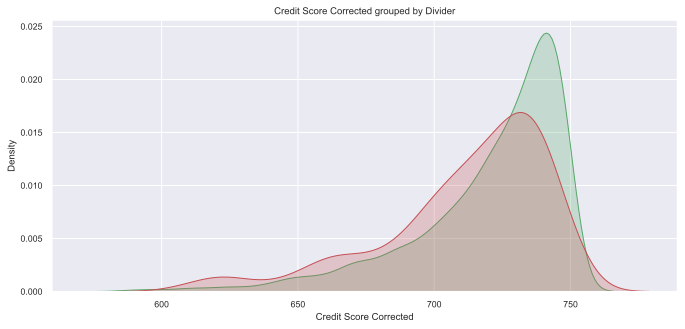

In [51]:
credit_score_with_divider_s = credit_score[credit_score['Credit Score Corrected'].notna()][['Credit Score Corrected', 'Divider']]
credit_score_s = credit_score_with_divider_s['Credit Score Corrected']
credit_score_divider_1 = credit_score_s[credit_score_with_divider_s['Divider'] == 1]
credit_score_divider_10 = credit_score_s[credit_score_with_divider_s['Divider'] == 10]

plot_kde(
    credit_score_divider_1,
    credit_score_divider_10,
    'Credit Score Corrected',
    'Credit Score Corrected grouped by Divider'
)

In [23]:
ttest_ind(
    a=credit_score_s[credit_score_with_divider_s['Divider'] == 1],
    b=credit_score_s[credit_score_with_divider_s['Divider'] == 10],
)

Ttest_indResult(statistic=6.374481913067594, pvalue=1.973940372449366e-10)

### Вывод

$p-value > \alpha$, значит можно считать верной нулевую гипотезу. Добавим новый признак в выборку.

In [24]:
df['Credit Score Corrected'] = credit_score['Credit Score Corrected']
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Credit Score Corrected
0,Own Home,482087.0,NaN,0,11,26.3,685960,1,NaN,1.0,debt consolidation,Short Term,99999999,47386,7914,749.0,0,749.0
1,Own Home,1025487.0,10+ years,0,15,15.3,1181730,0,NaN,0.0,debt consolidation,Long Term,264968,394972,18373,737.0,1,737.0
2,Home Mortgage,751412.0,8 years,0,11,35.0,1182434,0,NaN,0.0,debt consolidation,Short Term,99999999,308389,13651,742.0,0,742.0
3,Own Home,805068.0,6 years,0,8,22.5,147400,1,NaN,1.0,debt consolidation,Short Term,121396,95855,11338,694.0,0,694.0
4,Rent,776264.0,8 years,0,13,13.6,385836,1,NaN,0.0,debt consolidation,Short Term,125840,93309,7180,719.0,0,719.0


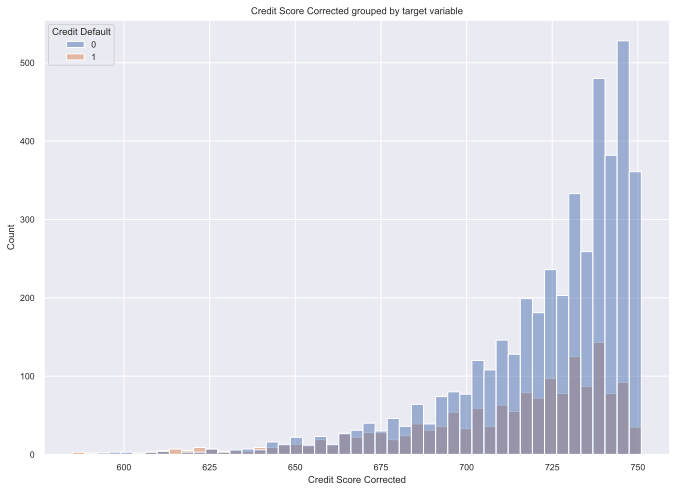

In [89]:
plt.figure(figsize=(10, 8))

sns.histplot(
    x="Credit Score Corrected", 
    hue=TARGET_NAME, 
    data=df, 
    multiple='layer'
)
plt.title('Credit Score Corrected grouped by target variable')

plt.show()

## Current Loan Amount

(6630 + 870) = 7500


C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


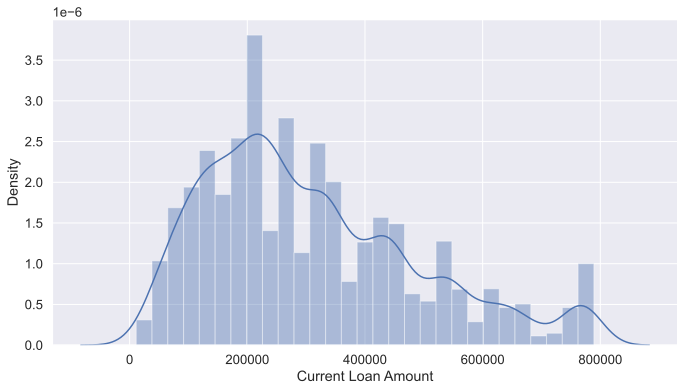

In [25]:
plot_by_threshold(df, 'Current Loan Amount', 10000000, 'left')

(6630 + 870) = 7500


C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


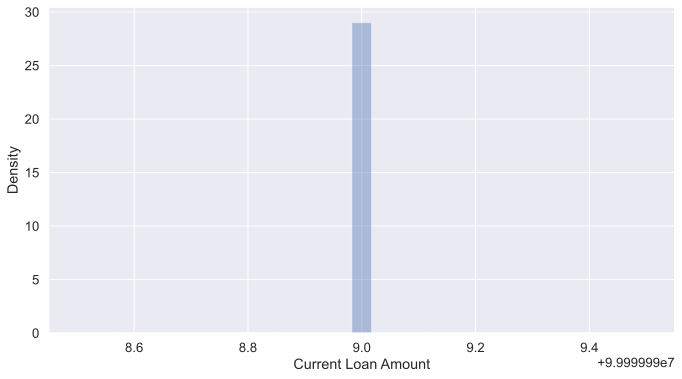

In [26]:
plot_by_threshold(df, 'Current Loan Amount', 10000000, 'right')

In [27]:
df[df['Current Loan Amount'] > 10000000]['Current Loan Amount'].value_counts()

99999999    870
Name: Current Loan Amount, dtype: int64

In [28]:
current_loan_amount_good_data = df[df['Current Loan Amount'] <= 10000000]

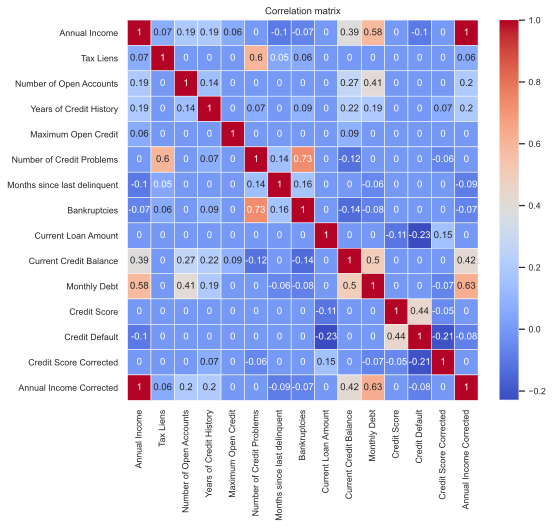

In [70]:
plot_corr(df)

In [30]:
corr = abs(current_loan_amount_good_data.corr()[['Current Loan Amount']]).sort_values(
    by='Current Loan Amount', 
    ascending=False
)
corr.head()

,Current Loan Amount
Current Loan Amount,1.000000
Annual Income,0.457887
Monthly Debt,0.438284
Current Credit Balance,0.368589
Credit Score Corrected,0.216333


In [31]:
current_loan_amount_good_data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Credit Score Corrected
count,5.073000e+03,6630.000000,6630.000000,6630.000000,6.630000e+03,6630.000000,3048.000000,6619.000000,6630.000000,6.630000e+03,6630.000000,5073.000000,6630.000000,5073.000000
mean,1.355864e+06,0.030920,11.130468,18.292323,9.592976e+05,0.171493,34.687992,0.117843,309024.390347,2.881239e+05,18364.505430,1223.263749,0.318703,718.348315
std,8.352678e+05,0.273168,4.923003,7.044410,1.702849e+07,0.502822,21.752647,0.348568,182294.008621,3.120490e+05,11881.789299,1726.313043,0.466009,28.576091
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,11242.000000,0.000000e+00,0.000000,585.000000,0.000000,585.000000
25%,8.396100e+05,0.000000,8.000000,13.500000,2.765070e+05,0.000000,16.000000,0.000000,172744.000000,1.141852e+05,10151.750000,709.000000,0.000000,706.000000
50%,1.162572e+06,0.000000,10.000000,17.000000,4.735500e+05,0.000000,32.000000,0.000000,265826.000000,2.091045e+05,16206.500000,730.000000,0.000000,727.000000
75%,1.627597e+06,0.000000,14.000000,21.800000,7.848060e+05,0.000000,50.000000,0.000000,430100.000000,3.590192e+05,23881.500000,743.000000,1.000000,740.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,789030.000000,6.506797e+06,136679.000000,7510.000000,1.000000,751.000000


Чтобы исправить значения в **"Current Loan Amount"**, сначало нужно устраниь пробелы в **"Annual Income"**, **"Months since last delinquent"** и **"Bankruptcies"**

In [32]:
high_corr_columns = corr.head().index.tolist()

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
current_loan_amount_train = current_loan_amount_good_data[current_loan_amount_good_data['Annual Income'].notna()][high_corr_columns]
lr = LinearRegression()
lr.fit(current_loan_amount_train[corr.head().index.tolist()], current_loan_amount_train[['Current Loan Amount']])

LinearRegression()

In [ ]:
# square_predicted = df[df['LifeSquare'].isna()]

## Annual Income

C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


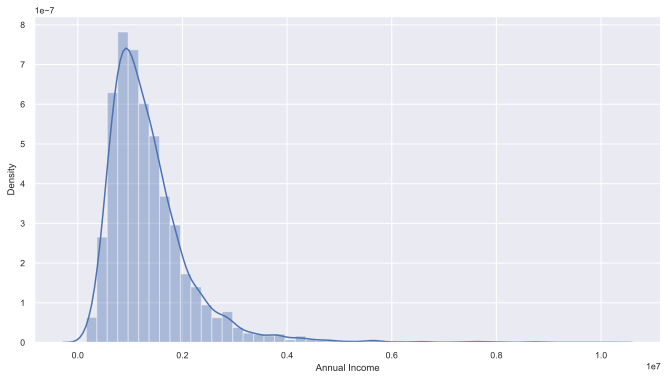

In [36]:
plot_dist(df, 'Annual Income')

In [37]:
corr = abs(df.corr()[['Annual Income']]).sort_values(
    by='Annual Income', 
    ascending=False
)
corr.head()

,Annual Income
Annual Income,1.000000
Monthly Debt,0.584819
Current Credit Balance,0.386481
Number of Open Accounts,0.188524
Years of Credit History,0.186531


In [38]:
high_corr_columns = corr.head().index.tolist()
high_corr_columns.remove('Annual Income')
high_corr_columns

['Monthly Debt',
 'Current Credit Balance',
 'Number of Open Accounts',
 'Years of Credit History']

In [39]:
df[high_corr_columns].describe()

,Monthly Debt,Current Credit Balance,Number of Open Accounts,Years of Credit History
count,7500.000000,7.500000e+03,7500.000000,7500.000000
mean,18314.454133,2.898332e+05,11.130933,18.317467
std,11926.764673,3.178714e+05,4.908924,7.041946
min,0.000000,0.000000e+00,2.000000,4.000000
25%,10067.500000,1.142565e+05,8.000000,13.500000
50%,16076.500000,2.093230e+05,10.000000,17.000000
75%,23818.000000,3.604062e+05,14.000000,21.800000
max,136679.000000,6.506797e+06,43.000000,57.700000


In [40]:
annual_income_train = df[df['Annual Income'].notna()][high_corr_columns]
annual_income_train_answers = df[df['Annual Income'].notna()]['Annual Income']
annual_income_train.head()

,Monthly Debt,Current Credit Balance,Number of Open Accounts,Years of Credit History
0,7914,47386,11,26.3
1,18373,394972,15,15.3
2,13651,308389,11,35.0
3,11338,95855,8,22.5
4,7180,93309,13,13.6


In [41]:
annual_income_predict = df[df['Annual Income'].isna()][high_corr_columns]
annual_income_predict.head()

,Monthly Debt,Current Credit Balance,Number of Open Accounts,Years of Credit History
5,18692,165680,12,14.6
8,17,19,17,15.7
9,17613,205333,10,24.6
10,14592,187492,7,11.5
16,18844,538346,6,17.8


In [42]:
annual_income_lr = LinearRegression()
annual_income_lr.fit(annual_income_train, annual_income_train_answers)

LinearRegression()

In [43]:
annual_income_predict_answers = annual_income_lr.predict(annual_income_predict)

In [44]:
annual_income_predict['Annual Income'] = annual_income_predict_answers
annual_income_predict.head()

,Monthly Debt,Current Credit Balance,Number of Open Accounts,Years of Credit History,Annual Income
5,18692,165680,12,14.6,1.297187e+06
8,17,19,17,15.7,4.526273e+05
9,17613,205333,10,24.6,1.381448e+06
10,14592,187492,7,11.5,1.193184e+06
16,18844,538346,6,17.8,1.541554e+06


In [45]:
annual_income_train['Annual Income'] = annual_income_train_answers
annual_income_train.head()

,Monthly Debt,Current Credit Balance,Number of Open Accounts,Years of Credit History,Annual Income
0,7914,47386,11,26.3,482087.0
1,18373,394972,15,15.3,1025487.0
2,13651,308389,11,35.0,751412.0
3,11338,95855,8,22.5,805068.0
4,7180,93309,13,13.6,776264.0


In [46]:
annual_income_corrected = annual_income_train[['Annual Income']].append(annual_income_predict[['Annual Income']], verify_integrity=True)

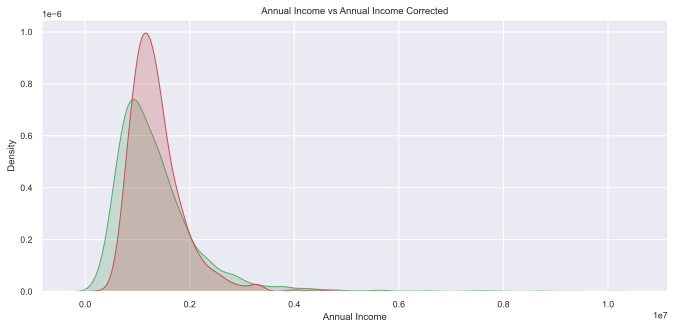

In [62]:
plot_kde(
    df['Annual Income'],
    annual_income_predict['Annual Income'],
    'Annual Income',
    'Annual Income vs Annual Income Corrected'
)

**Наблюдение**

Заполненные с помощью регрессии пропуски 

**Гипотеза** 

* Нулевая гипотеза: исправленные данные можно отнести к основной выборке (схожее распределение, удовлетворительное качество восстановления)
* Альтернативная гипотеза: исправленные данные нельзя отнести к основной выборке
* Критерий: критерий Стьюдента
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо сравнить средние значения выборки без пропусков и выборки с восстановленными значениями.
Если вероятность того, что мат. ожидания в исходных группах равны при данных выборках, будет менее 5%, то можно будет говорить о том, что данные восстановленные данные недостаточно точны.

In [64]:
ttest_ind(
    a=df[df['Annual Income'].notna()]['Annual Income'],
    b=annual_income_predict['Annual Income'],
)

Ttest_indResult(statistic=-0.21989358452277966, pvalue=0.8259600189966037)

### Вывод

$p-value > \alpha$, значит можно считать верной нулевую гипотезу. Добавим новый признак в выборку.

In [65]:
df['Annual Income Corrected'] = annual_income_corrected['Annual Income']
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Credit Score Corrected,Annual Income Corrected
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000,5943.000000,7.500000e+03
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733,720.086993,1.367418e+06
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874,27.957233,7.893805e+05
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000,585.000000,1.645970e+05
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000,708.000000,8.793200e+05
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000,729.000000,1.207174e+06
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000,740.000000,1.626521e+06
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000,751.000000,1.014934e+07


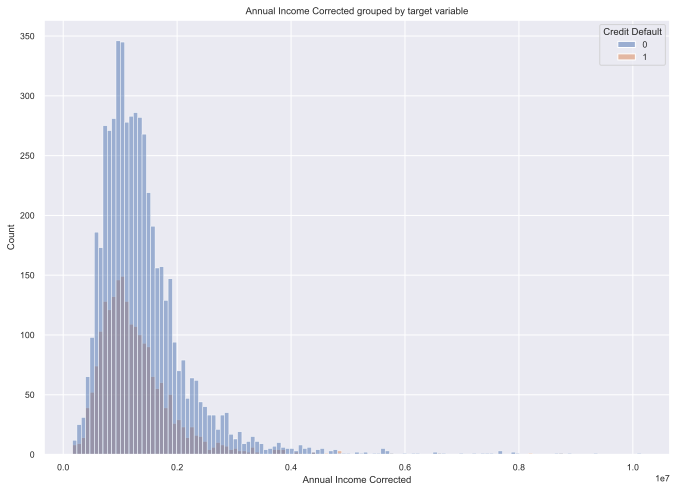

In [90]:
plt.figure(figsize=(10, 8))

sns.histplot(
    x="Annual Income Corrected", 
    hue=TARGET_NAME, 
    data=df, 
    multiple='layer'
)
plt.title('Annual Income Corrected grouped by target variable')

plt.show()

## Months since last delinquent

C:\Users\regbi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


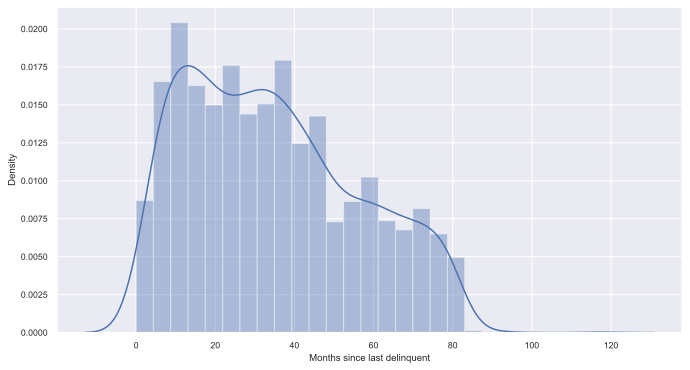

In [73]:
plot_dist(df, 'Months since last delinquent')

In [72]:
corr = abs(df.corr()[['Months since last delinquent']]).sort_values(
    by='Months since last delinquent', 
    ascending=False
)
corr.head(10)

,Months since last delinquent
Months since last delinquent,1.000000
Bankruptcies,0.162710
Number of Credit Problems,0.139905
Annual Income,0.101787
Annual Income Corrected,0.091092
Monthly Debt,0.057702
Tax Liens,0.052446
Number of Open Accounts,0.032740
Current Credit Balance,0.027198
Credit Score Corrected,0.016527


In [100]:
np.isnan(df['Months since last delinquent'][0]

True

In [108]:
check_df = df[['Months since last delinquent', TARGET_NAME]]
check_df['col_filled'] = [1 if not np.isnan(x) else 0 for x in check_df['Months since last delinquent']]
check_df.head()

<ipython-input-108-7469e6002ea0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_df['col_filled'] = [1 if not np.isnan(x) else 0 for x in check_df['Months since last delinquent']]


,Months since last delinquent,Credit Default,col_filled
0,NaN,0,0
1,NaN,1,0
2,NaN,0,0
3,NaN,0,0
4,NaN,0,0


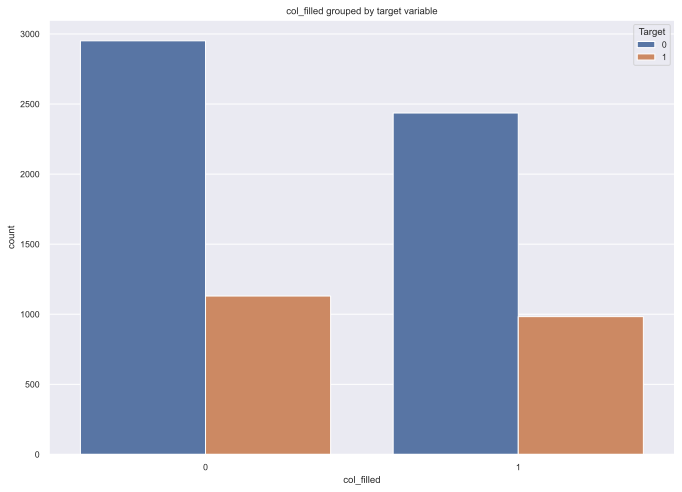

In [109]:
plt.figure(figsize=(10, 8))

sns.countplot(x="col_filled", hue=TARGET_NAME, data=check_df)
plt.title('col_filled grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()